# Practice PS07: Outlier analysis

Author: <font color="blue">Nil Tomas Plans</font>

E-mail: <font color="blue">nil.tomas01@estudiant.upf.edu</font>

Date: <font color="blue">15/11/2024</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import io
import random
import numpy as np

# 1. Dataset

In [2]:
# LEAVE AS-IS

df = pd.read_csv('annthyroid.csv', sep=',')

# Replace the "label" column by an "abnormal" column
df['result'] = df['label'].apply(lambda x: 'abnormal' if x == 1 else 'normal')
df.drop(columns=['label'], inplace=True)

<font size="+1" color="red">Replace this cell with your code to print the number and percentages of patients in each group.</font>

In [3]:
if(len(df)!=0):
    percent1=len(df[df['result']=='normal'])/len(df)
    percent2=len(df[df['result']=='abnormal'])/len(df)
else: 
    percent1=0
    percent2=0
print("Total patients: ", len(df))
print("Normal thyroid: ", len(df[df['result']=='normal']), f"({percent1:.2%})")
print("Abnormal thyroid: ", len(df[df['result']=='abnormal']), f"({percent2:.2%})")


Total patients:  7200
Normal thyroid:  6666 (92.58%)
Abnormal thyroid:  534 (7.42%)


<font size="+1" color="red">Replace this cell with your code to print the 10 normal exams and the centroid of all normal exams, and the first 10 abnormal exams and the centroid of all abnormal exams.</font>

In [4]:
abn_exams=df[df['result'] == 'abnormal']#create abn_exams that are all the rows (exams) that result is ='abnormal'
nor_exams=df[df['result'] == 'normal']

#print results
print("First 10 normal exams:\n",nor_exams.head(10),"\n With centroid:\n",nor_exams.mean(numeric_only=True) )
print()
print("First 10 abnormal exams:\n",abn_exams.head(10),"\n With centroid:\n",abn_exams.mean(numeric_only=True) )


First 10 normal exams:
      f1       f2     f3     f4     f5     f6  result
0  0.73  0.00060  0.015  0.120  0.082  0.146  normal
1  0.24  0.00025  0.030  0.143  0.133  0.108  normal
2  0.47  0.00190  0.024  0.102  0.131  0.078  normal
3  0.64  0.00090  0.017  0.077  0.090  0.085  normal
4  0.23  0.00025  0.026  0.139  0.090  0.153  normal
5  0.69  0.00025  0.016  0.086  0.070  0.123  normal
6  0.85  0.00025  0.023  0.128  0.104  0.121  normal
7  0.48  0.00208  0.020  0.086  0.078  0.110  normal
8  0.67  0.00130  0.024  0.087  0.109  0.080  normal
9  0.76  0.00010  0.029  0.124  0.128  0.097  normal 
 With centroid:
 f1    0.518314
f2    0.002098
f3    0.020384
f4    0.112193
f5    0.097705
f6    0.116132
dtype: float64

First 10 abnormal exams:
        f1       f2      f3      f4     f5      f6    result
10   0.62  0.01100  0.0080  0.0730  0.074  0.0980  abnormal
19   0.50  0.06100  0.0096  0.0130  0.116  0.0110  abnormal
27   0.78  0.02500  0.0090  0.0500  0.084  0.0600  abnormal
43 

<font size="+1" color="red">Replace this cell with a brief comment indicating, based only on the centroids, which features do you think could be useful for differentiating between normal and abnormal thyroids? Why?</font>

<font size="+1" color="blue">In my opinion those features that could be useful for differentiating between normal and abnormal thyroids are those that are more different between centroids, therefore will have a meaningful impact on the column result. Those are feature 2 (f2), feature 4 (f4) and feature 6 (f6).</font>

<font size="+1" color="red">Replace this cell with your code to create a scatter matrix as described above.</font>

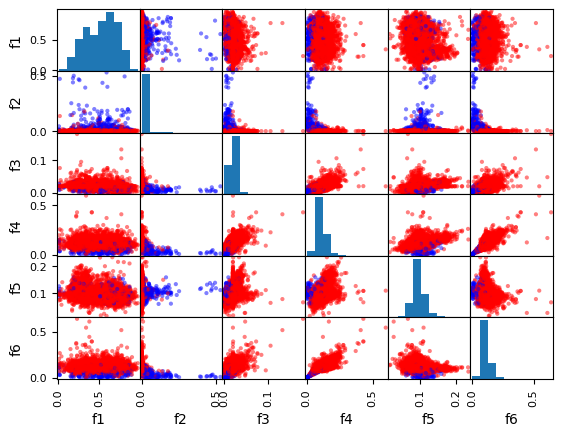

In [5]:
color_code = {'abnormal':'blue', 'normal': 'red'}

colors = df['result'].apply(lambda x: color_code[x])

pd.plotting.scatter_matrix(df, c=colors)
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary on whether you already guess any difference between normal and abnormal exams, based on combinations of features. What are the differences you can appreciate?</font>

<font size="+1" color="blue">From the plot of above I can diferenciate some features that make the separation between abnormal data (blue) and normal (red) more notorious, mainly feature 2.
For example, as differences I can appreciate, in feature 2, the data considered abnormal has a coeficient higher than the normal data. Instead in feature 6, those values that we consider abnormal are those that have lower values (close to 0)
</font>

# 1. Create isolation tree

## 1.1. Random dimension and random split

<font size="+1" color="red">Replace this cell with code implementing "pick_random_dimension" and a couple of calls to this function.</font>

In [6]:
columns_to_ignore=['result']

def pick_random_dimension(df, columns_to_ignore):
    df_only_features=df.drop(columns_to_ignore,axis=1)
    df_output=df_only_features.sample(axis='columns')#random sampling
    return df_output

#call to the function
random_dim=pick_random_dimension(df, columns_to_ignore)
display(random_dim.head())  
    

,f1
0,0.73
1,0.24
2,0.47
3,0.64
4,0.23


<font size="+1" color="red">Replace this cell with code implementing "pick_random_split" and a couple of calls to test this function; each call should return a random split point chosen uniformly at random between the minimum and the maximum value along a dimension.</font>

In [7]:
def pick_random_split(df, dimension):
    split_val=random.uniform(np.min(df[dimension]),np.max(df[dimension]))
    return split_val

#call to the function
pick_rand_split=pick_random_split(df, random_dim.columns[0])
print('pick_rand_split',pick_rand_split)

pick_rand_split 0.5959724878374342


## 1.2. Implement split data into two

<font size="+1" color="red">Replace this cell with code implementing "split_dataset".</font>

In [8]:
def split_dataset(df, dimension, split):
    d1 = df[df[dimension] <= split]
    d2 = df[df[dimension] > split]
    return d1,d2


<font size="+1" color="red">Replace this cell with code testing "split_dataset", i.e., select a dimension and a cut-off and split the dataset, then print the two pieces and check that it is working correctly. Also check that the sum of the sizes of the two pieces is the size of the original data.</font>

In [9]:
(left, right) = split_dataset(df, 'f1', 0.5)
display(left.head(), right.head())
#We observe that it is working correcly. However, if we select a split value >=1 the right dataset won't have any row.

if(len(left)+len(right)==len(df)):
    print(f"Size of {len(df)} ( original data) is equal to sum of partials datasets = ",len(left)+len(right) )
else:
    print(f"Size of {len(df)} ( original data) is NOT equal to sum of partials datasets = ",len(left)+len(right) )


,f1,f2,f3,f4,f5,f6,result
1,0.24,0.00025,0.030,0.143,0.133,0.108,normal
2,0.47,0.00190,0.024,0.102,0.131,0.078,normal
4,0.23,0.00025,0.026,0.139,0.090,0.153,normal
7,0.48,0.00208,0.020,0.086,0.078,0.110,normal
11,0.18,0.00010,0.023,0.098,0.085,0.115,normal


,f1,f2,f3,f4,f5,f6,result
0,0.73,0.00060,0.015,0.120,0.082,0.146,normal
3,0.64,0.00090,0.017,0.077,0.090,0.085,normal
5,0.69,0.00025,0.016,0.086,0.070,0.123,normal
6,0.85,0.00025,0.023,0.128,0.104,0.121,normal
8,0.67,0.00130,0.024,0.087,0.109,0.080,normal


Size of 7200 ( original data) is equal to sum of partials datasets =  7200


## 1.3. Create one isolation tree

In [10]:
# LEAVE AS-IS

dfi = df.copy()
dfi.insert(0, 'id', [("P%.4d" % x) for x in range(1, 1 + len(df))])
dfi

,id,f1,f2,f3,f4,f5,f6,result
0,P0001,0.73,0.00060,0.0150,0.120,0.082,0.1460,normal
1,P0002,0.24,0.00025,0.0300,0.143,0.133,0.1080,normal
2,P0003,0.47,0.00190,0.0240,0.102,0.131,0.0780,normal
3,P0004,0.64,0.00090,0.0170,0.077,0.090,0.0850,normal
4,P0005,0.23,0.00025,0.0260,0.139,0.090,0.1530,normal
...,...,...,...,...,...,...,...,...
7195,P7196,0.59,0.00250,0.0208,0.079,0.099,0.0800,normal
7196,P7197,0.51,0.10600,0.0060,0.005,0.089,0.0055,abnormal
7197,P7198,0.51,0.00076,0.0201,0.090,0.067,0.1340,normal
7198,P7199,0.35,0.00280,0.0201,0.090,0.089,0.1010,normal


<font size="+1" color="red">Replace this cell with you code implementing "isolation_tree".</font>

In [11]:
def isolation_tree(data, columns_to_ignore, min_items):
    tree = {}
    if len(data) <= min_items:
        return {"contents": data}
    else:
        
        dimension=pick_random_dimension(data, columns_to_ignore)#Selects a random dimension from the data, ignoring the columns_to_ignore
        split=pick_random_split(data, dimension.columns[0])#Selects a random split point along that dimension
        (left, right) = split_dataset(data, dimension.columns[0],split)
        tree={"left": isolation_tree(left, columns_to_ignore, min_items),#here left and right needs to be a recursive step
              "right": isolation_tree(right, columns_to_ignore, min_items),#otherwise we won't achieve the tree that we want
              "dimension": dimension.columns[0],
              "split": split}
        return tree   

In [12]:
# LEAVE AS-IS

mytree = isolation_tree(dfi, ['id', 'result'], 2000)


In [13]:
# LEAVE AS-IS

class tree_drawing(object):
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

    def __str__(self, label='', level=0):
        ret = "-" * level + label + ":" + repr(self.value)+"\n"
        if self.left:
            ret += self.left.__str__("<", level+1)
        if self.right:
            ret += self.right.__str__(">", level+1)
        return ret

    def __repr__(self):
        return self.value
    
def tree_to_nodes(tree):
    if 'contents' in tree:
        data = tree['contents']
        normal_count = len(data[data['result'] == 'normal'])
        abnormal_count = len(data[data['result'] == 'abnormal'])
        description = "external node: %d normal + %d abnormal" % (normal_count, abnormal_count)
        return tree_drawing(description)
    else:
        left = tree['left']
        right = tree['right']
        description = 'internal node: ' + tree['dimension'] + ' <= ' + ("%.2f" % tree['split'])
        n = tree_drawing(description, tree_to_nodes(left), tree_to_nodes(right) )
        return n

In [14]:
print(tree_to_nodes(mytree))

:'internal node: f6 <= 0.08'
-<:'external node: 406 normal + 235 abnormal'
->:'internal node: f3 <= 0.14'
--<:'internal node: f3 <= 0.06'
---<:'internal node: f5 <= 0.22'
----<:'internal node: f5 <= 0.21'
-----<:'internal node: f3 <= 0.03'
------<:'internal node: f6 <= 0.22'
-------<:'internal node: f4 <= 0.03'
--------<:'external node: 1 normal + 0 abnormal'
-------->:'internal node: f3 <= 0.03'
---------<:'internal node: f6 <= 0.20'
----------<:'internal node: f1 <= 0.13'
-----------<:'external node: 32 normal + 4 abnormal'
----------->:'internal node: f4 <= 0.10'
------------<:'external node: 1818 normal + 161 abnormal'
------------>:'internal node: f2 <= 0.04'
-------------<:'internal node: f6 <= 0.12'
--------------<:'internal node: f3 <= 0.01'
---------------<:'external node: 54 normal + 7 abnormal'
--------------->:'internal node: f3 <= 0.02'
----------------<:'external node: 193 normal + 16 abnormal'
---------------->:'external node: 1793 normal + 59 abnormal'
-------------->:'

<font size="+1" color="red">Replace this cell with you code implementing `get_max_tree_depth`</font>

In [15]:
def get_max_tree_depth(tree):
    if "contents" in tree: #if the tree is a leaf returns 1 "base case"
        return 1
    else:#recursive step. I apply recursion to each side of the tree
        left_depth = get_max_tree_depth(tree["left"])
        right_depth = get_max_tree_depth(tree["right"])
        return max(left_depth, right_depth) + 1



<font size="+1" color="red">Replace this cell with you code testing `get_max_tree_depth` on `mytree`.</font>

In [16]:
#print values
max_depth = get_max_tree_depth(mytree)
print("Maximum depth of the tree:", max_depth)

Maximum depth of the tree: 17


# 2. Create isolation forests and find depth of items

## 2.1. Create an isolation forest

<font size="+1" color="red">Replace this cell with you code implementing "isolation_tree".</font>

In [17]:
def isolation_forest(dfi, columns_to_ignore, min_items, num_trees):
    trees_array=[]
    for i in range(num_trees):
        trees_array.append(isolation_tree(dfi, columns_to_ignore, min_items))
    return trees_array



    


In [18]:
# MODIFY IF YOU SEE THAT IT IMPROVES THE SEPARATION BETWEEN CLASSES

min_items = 50
num_trees = 20

In [19]:
# LEAVE AS-IS

myforest = isolation_forest(dfi, ['id', 'result'], min_items, num_trees)
print("The forest has %d trees" % len(myforest))

The forest has 20 trees


In [20]:
# LEAVE AS-IS

for i in range(0, 2):
    print("Tree number %d" % i)
    print(tree_to_nodes(myforest[i]))
    print()

Tree number 0
:'internal node: f2 <= 0.11'
-<:'internal node: f4 <= 0.25'
--<:'internal node: f5 <= 0.05'
---<:'external node: 32 normal + 0 abnormal'
--->:'internal node: f2 <= 0.09'
----<:'internal node: f1 <= 0.57'
-----<:'internal node: f3 <= 0.07'
------<:'internal node: f3 <= 0.01'
-------<:'internal node: f3 <= 0.01'
--------<:'external node: 22 normal + 16 abnormal'
-------->:'internal node: f6 <= 0.10'
---------<:'internal node: f6 <= 0.01'
----------<:'external node: 0 normal + 2 abnormal'
---------->:'internal node: f2 <= 0.05'
-----------<:'internal node: f4 <= 0.07'
------------<:'external node: 22 normal + 9 abnormal'
------------>:'external node: 23 normal + 1 abnormal'
----------->:'external node: 1 normal + 10 abnormal'
--------->:'internal node: f1 <= 0.51'
----------<:'external node: 45 normal + 3 abnormal'
---------->:'external node: 27 normal + 1 abnormal'
------->:'internal node: f5 <= 0.06'
--------<:'external node: 23 normal + 0 abnormal'
-------->:'internal nod

## 2.2. Find the average depth of an item

In [21]:
# LEAVE AS-IS

def find_element_depth_aux(tree, column_name, column_value, depth):
    
    if 'contents' in tree:
        # We are in a leaf node
        
        data = tree['contents']
        matching = data[data[column_name] == column_value]
        if len(matching) == 0:
            return None
        elif len(matching) > 1:
            print("Error: multiple elements match your search criterion")
            return None
        else:
            return depth
    else:
        # We are in an internal node
        
        in_left = find_element_depth_aux(tree['left'], column_name, column_value, depth+1)
        if in_left == None:
            in_right = find_element_depth_aux(tree['right'], column_name, column_value, depth+1)
            return in_right
        else:
            return in_left
        
def find_element_depth(tree, column_name, column_value):
    return find_element_depth_aux(tree, column_name, column_value, 0)

In [22]:
# LEAVE AS-IS

def print_sample_depths(df, sample_size, tested_tree):

    for result in ['normal', 'abnormal']:
        print("Depths for %s items" % result)

        sample = list(df[df['result'] == result]['id'].sample(sample_size))

        max_depth = get_max_tree_depth(tested_tree)
        for random_id in sample:
            print("- id=%s is at depth %d/%d" % (random_id, find_element_depth(tested_tree, "id", random_id), max_depth))
            
    
print("On shallow tree, having maximum depth %d" % get_max_tree_depth(mytree))
print_sample_depths(dfi, 5, mytree)
print()

print("On first tree of forest, having maximum depth %d" % get_max_tree_depth(myforest[0]))
print_sample_depths(dfi, 5, myforest[0])
print()


On shallow tree, having maximum depth 17
Depths for normal items
- id=P6793 is at depth 12/17
- id=P5420 is at depth 16/17
- id=P2987 is at depth 16/17
- id=P4205 is at depth 14/17
- id=P1472 is at depth 12/17
Depths for abnormal items
- id=P1868 is at depth 1/17
- id=P2629 is at depth 1/17
- id=P1635 is at depth 12/17
- id=P5458 is at depth 12/17
- id=P4968 is at depth 12/17

On first tree of forest, having maximum depth 41
Depths for normal items
- id=P2581 is at depth 27/41
- id=P4291 is at depth 6/41
- id=P7037 is at depth 24/41
- id=P4927 is at depth 12/41
- id=P6121 is at depth 20/41
Depths for abnormal items
- id=P5720 is at depth 26/41
- id=P5692 is at depth 25/41
- id=P1043 is at depth 8/41
- id=P4328 is at depth 19/41
- id=P4601 is at depth 12/41



<font size="+1" color="red">Replace this cell with a brief commentary on these depths.</font>

<font size="+1" color="blue">For the first group on shallow trees the maximum depth is 14 and most depths for normal and abnormal items vary between the range [0,14]. For the normal items, they are values a bit les extreme than the abnormal where there ara patients with depth =13
For the second group on first tree of forest with a max depth of 38 the range of variation is bigger probably because of the additional complexity of the forest.</font>

<font size="+1" color="red">Replace this cell with you code implementing "find_average_depth".</font>

In [23]:
def find_average_depth(forest, column_name, value):
    avg = []

    for tree in forest:
        depth = find_element_depth(tree, column_name, value)
        avg.append(depth)
    if len(avg)==0:
        return 0
    return sum(avg) / len(avg)

In [24]:
# LEAVE AS-IS

for result in ['normal', 'abnormal']:
    print("Average depths for %s items" % result)
    
    sample = list(dfi[dfi['result'] == result]['id'].sample(5))
    
    for random_id in sample:
        print("- id=%s is at average depth %.1f" % (random_id, find_average_depth(myforest, "id", random_id)))
    
    print()

Average depths for normal items
- id=P1929 is at average depth 22.3
- id=P5607 is at average depth 15.1
- id=P6184 is at average depth 19.1
- id=P5353 is at average depth 21.8
- id=P1419 is at average depth 22.9

Average depths for abnormal items
- id=P5260 is at average depth 19.5
- id=P3204 is at average depth 20.6
- id=P3153 is at average depth 10.2
- id=P5190 is at average depth 16.2
- id=P0746 is at average depth 15.3



<font size="+1" color="red">Replace this cell with a brief commentary indicating how would you make the "find_average_depth" function more efficient if you wanted to obtain the average depth of **all** elements. Be concise but be precise, providing pseudocode if you consider it clearer than a text explanation.</font>

<font size="+1" color="blue">To start I think that we should avoid calling at each iteration the function find_average_depth because it's very expensive computationally talking. Therefore, what we could do it's go through each tree only one's and store the depth of each element in a dictionary {item:depth}. </font>

# 3. Find the average depth of a sample of normal and abnormal points

## 3.1. Determine average depths

In [25]:
# LEAVE AS-IS

abnormal_point_ids = list(dfi[dfi['result'] == 'abnormal']['id'].sample(30))
normal_point_ids = list(dfi[dfi['result'] == 'normal']['id'].sample(30))

print("Normal point sample ids   : %s" % normal_point_ids)
print("Abnormal point sample ids : %s" % abnormal_point_ids)

Normal point sample ids   : ['P6902', 'P3445', 'P4413', 'P6970', 'P3029', 'P1598', 'P0667', 'P3333', 'P3763', 'P5564', 'P6571', 'P4009', 'P4041', 'P3975', 'P6409', 'P2779', 'P2461', 'P2965', 'P1901', 'P1593', 'P5888', 'P0087', 'P0637', 'P3768', 'P1257', 'P3443', 'P0489', 'P3035', 'P5259', 'P0712']
Abnormal point sample ids : ['P0116', 'P6996', 'P3477', 'P3276', 'P5000', 'P0430', 'P5085', 'P2459', 'P4738', 'P5619', 'P2775', 'P1602', 'P0894', 'P1105', 'P3863', 'P1608', 'P6025', 'P6270', 'P6300', 'P7118', 'P6574', 'P0518', 'P2899', 'P7058', 'P0795', 'P2207', 'P3909', 'P5862', 'P4339', 'P2994']


In [26]:
# LEAVE AS-IS

normal_depths = []
print("Depths of items in the 'normal' sample:")
for i in normal_point_ids:
    depth = find_average_depth(myforest, 'id', i)
    normal_depths.append(depth)
    print(" element id=%s is at average depth %.2f" % (i, depth))
print()

Depths of items in the 'normal' sample:
 element id=P6902 is at average depth 19.45
 element id=P3445 is at average depth 16.30
 element id=P4413 is at average depth 22.65
 element id=P6970 is at average depth 21.55
 element id=P3029 is at average depth 18.60
 element id=P1598 is at average depth 23.80
 element id=P0667 is at average depth 19.30
 element id=P3333 is at average depth 25.65
 element id=P3763 is at average depth 19.40
 element id=P5564 is at average depth 18.10
 element id=P6571 is at average depth 24.40
 element id=P4009 is at average depth 19.40
 element id=P4041 is at average depth 18.40
 element id=P3975 is at average depth 15.45
 element id=P6409 is at average depth 25.20
 element id=P2779 is at average depth 23.05
 element id=P2461 is at average depth 17.60
 element id=P2965 is at average depth 12.65
 element id=P1901 is at average depth 17.45
 element id=P1593 is at average depth 11.20
 element id=P5888 is at average depth 21.95
 element id=P0087 is at average dept

In [27]:
# LEAVE AS-IS

abnormal_depths = []
print("Depths of items in the 'abnormal' sample:")
for i in abnormal_point_ids:
    depth = find_average_depth(myforest, 'id', i)
    abnormal_depths.append(depth)
    print(" element id=%s is at average depth %.2f" % (i, depth))
print()

Depths of items in the 'abnormal' sample:
 element id=P0116 is at average depth 9.70
 element id=P6996 is at average depth 11.40
 element id=P3477 is at average depth 11.15
 element id=P3276 is at average depth 7.60
 element id=P5000 is at average depth 14.30
 element id=P0430 is at average depth 14.75
 element id=P5085 is at average depth 19.00
 element id=P2459 is at average depth 14.95
 element id=P4738 is at average depth 19.65
 element id=P5619 is at average depth 16.00
 element id=P2775 is at average depth 4.95
 element id=P1602 is at average depth 12.65
 element id=P0894 is at average depth 13.20
 element id=P1105 is at average depth 16.60
 element id=P3863 is at average depth 7.90
 element id=P1608 is at average depth 18.40
 element id=P6025 is at average depth 19.50
 element id=P6270 is at average depth 18.85
 element id=P6300 is at average depth 10.70
 element id=P7118 is at average depth 16.20
 element id=P6574 is at average depth 21.20
 element id=P0518 is at average depth 

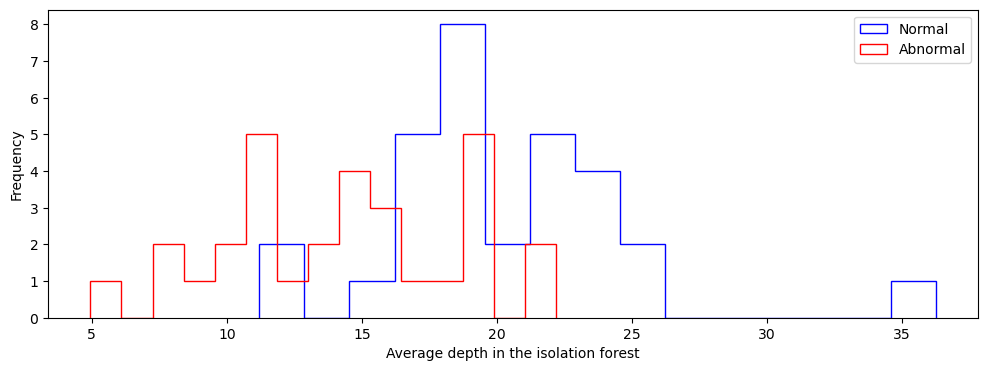

In [28]:
# LEAVE AS-IS

plt.figure(figsize=(12,4))
plt.hist(normal_depths, label='Normal', bins=15, density=False, histtype='step', color='blue')
plt.hist(abnormal_depths, label='Abnormal', bins=15, density=False, histtype='step', color='red')
plt.xlabel('Average depth in the isolation forest')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary of what you see in this histogram.</font>

<font size="+1" color="blue">First, we can observe that the abnormal range of values for average depth goes from 8 to 23 approximately. Instead, the normal values have a range from 9 to 26 approximately. Additionaly, for the abnormal values we observe a high accumulation of elements a average depth between 18 and 20. For the normal values, this high accumulation of elements takes place on average depth from 20 to 22 approximately</font>

## 3.2. Compute outlier scores and conclude

In [29]:
# LEAVE AS-IS

# Source: https://stackoverflow.com/a/27683292/1235784

from numpy import euler_gamma
from scipy.special import digamma
def harmonic(s):
    return digamma(s + 1) + euler_gamma

In [30]:
# LEAVE AS-IS

def outlier_score_factory():
    n = len(df.index)
    c_n = 2.0 * harmonic(n - 1.0) - (2.0 * (n-1)/n)
    return lambda d: 2.0**(-d/c_n)

outlier_score = outlier_score_factory()

normal_scores = [outlier_score(d) for d in normal_depths]
abnormal_scores = [outlier_score(d) for d in abnormal_depths]

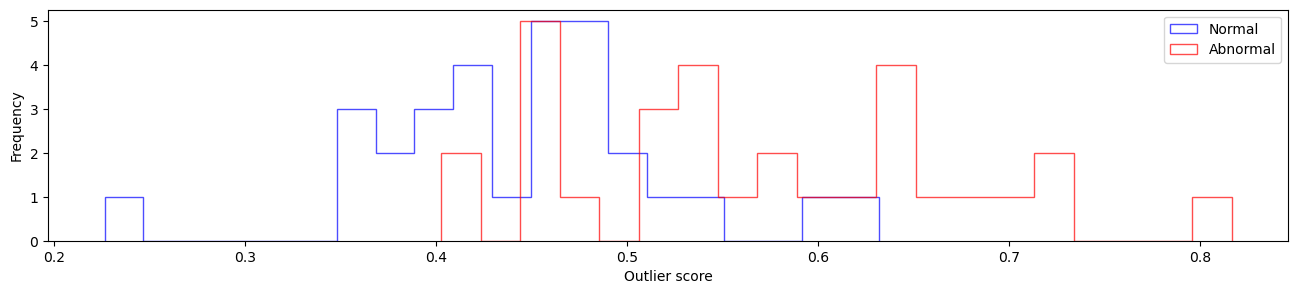

In [31]:
# LEAVE AS-IS

plt.figure(figsize=(16,3))

# Plot the two histograms; the parameter 'alpha' is the transparency of the bar
plt.hist(normal_scores, label='Normal', bins=20, density=False, histtype='step', color='blue', alpha=0.7)
plt.hist(abnormal_scores, label='Abnormal', bins=20, density=False, histtype='step', color='red', alpha=0.7)

# Draw the axis labels, legend, and display
plt.xlabel('Outlier score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary of what you see in this histogram.</font>

<font size="+1" color="blue">First the range of normal scores goes from 0,325 to 0,675 approximately. Whereas the abnormal values go from 0,4 to 0,75 approx. We observe also that normal values are more frequent on scores between 0,35 and 0,45 and abnormal values between 0,45 to 0,5. Therefore, values out of these ranges are less frequent</font>

<font size="+1" color="red">Replace this cell with your code to determine an optimal threshold.</font>

In [32]:
# Ensure `normal_classified` and `abnormal_classified` are reset for each threshold iteration
merge_lists=normal_scores + abnormal_scores
sorted_scores=sorted(merge_lists)#merge lists and sorted to generate all the possible threshold values for classification
opt_threshold = None
best_accuracy = 0

for threshold in sorted_scores:#for each score I'll count correct classifications given a threshold 
    cont_norm = 0  
    cont_abn = 0  

    for score in normal_scores:
        if score <= threshold: #if less than threshold
            cont_norm += 1

    for score in abnormal_scores:
        if score > threshold: #if over the score
            cont_abn += 1

    #compute accuracy and check if it's better than best_accuracy, if it's the case updata values
    sum_correct_class=(cont_norm + cont_abn)
    accuracy = sum_correct_class / (len(merge_lists))

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        opt_threshold = threshold

print("Optimal threshold:", opt_threshold)



Optimal threshold: 0.5024281046192122


<font size="+1" color="red">Replace this cell with your evaluation of the optimal threshold.</font>

In [33]:
fn=0
fp=0
#computing false negatives and false positives
for score in abnormal_scores:
    if score <= opt_threshold: 
        fn += 1

for score in normal_scores:
    if score > opt_threshold:
        fp += 1

fp_rate = fp / len(normal_scores)
fn_rate = fn / len(abnormal_scores)
#print rates
print("False positive Rate :", fp_rate)
print("False negative Rate :", fn_rate)

False positive Rate : 0.13333333333333333
False negative Rate : 0.26666666666666666


<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>